 # denoising images

## retirando ruidos de imagens

### o famoso ruído sal e pimenta sendo trabalhado com filtro de mediana

Neste trabalho, o algoritmo filtro de ruído para retirar o ruído de quadros de pixels 3x3 foi feito pela gente, com isso, ele ainda apresenta falhas.

Falhas estas que também foram estudadas para poder serem retiradas também de maneira posterior.

O codigo inteiro está no arquivo chamado ```denoise.py```

Ele está inteiramente comentado, explicando cada parte do trabalho e como ele faz para o trabalho completo 

criamos 5 funções importantes, e iremos apresentar-las abaixo :
<br>
<hr>

• ```cizando``` -> deixa a imagem cinza para poder ser trabalhada de maneira mais fácil. Única função que usa o cv2.
<br><br>
• ```adicionar_ruido``` -> adiciona o ruido sal e pimenta sobre 2 modos: <br>
"s": adiciona só sal (pixel[x][y] = 255).
<br>
"p": adiciona só a pimenta (pixel[x][y] = 0). (o filtro mediana chora)
<br>
"p&s": adiciona os dois 
<!-- ainda pode ser deifinido o grau (taxa de quantidade de pixels) presentes na imagem, de 0 a 1, (cuidado, grau > 1, pode danificar a imagem toda. Ex: 0.5, pode variar apenas 50% dos pixels aleatórios da imagem.
 -->
<br>

• ```plt_169```-> faz a plotagem da matriz da imagem em 16x9
<br><br>
• ```mediana2D```-> organiza o pixel 3x3 em uma dimensão e em seguida tira a sua mediana (isso poderia ser feito com o numpy, mas como é a mediana, e o trabalho fala dele resolvi fazer na mão msm)
<br><br>
• ```mediana2D_filtro``` -> usa a mediana2D para tirar a mediana do pixel 3x3 e assim, de acordo com o modo que é usado, filtra o pixel e o retorna limitado de acordo com o que se é pedido (é aqui se encontra, toda a magia do código).
<br>
modos:<br>
"T" -> filtra pela distância em que o módulo do valor do pixel estiver da mediana encontrada, independente se o valor do pixel for maior ou igual a mediana. Se a distância do valor do pixel para a mediana for maior que o valor do limite determinado pelo usuário no parâmetro T, o novo valor do pixel será o da mediana da matriz pixel 3x3.
<br>
"med" -> filtra somente pela mediana. Se o valor so pixel for maior do que o da mediana da matriz, o novo valor desse pixel será o da mediana.
<br>
<b>Nota:</b> A med não consegue tirar a pimenta da imagem, pois são valores pequenos (tpo, o próprio zero). Só o T, que consegue fazer algo legal, mas com muita pixelagem em jogo. <br> Se vc for usar um ruído mais ameno, ou controlado, poderá brincar com isso numa boa, <b>mas nunca use o ruído gaussiano nisso</b>, pois só <b>Fourier</b> ou algo parecido para brincar com isso também.
<br><br>
• ```filtrar_img``` -> Principal função do jogo. <br> é aqui em vc vai jogar a sua imagem e torcer para que ela seja. É isso. <br>
<b>Nota:</b> O reshape que é usado para alterar o formato da imagem cinza de (X,Y) para (X * Y / D², D, D), no nosso caso, D=3, infelizmente é o do numpy, pois eu tentei criar um algoritmo top para isso, mas não consegui ;-;. 

<hr>

## começando a brincar

vamos começar importando a biblioteca cv2 eo arquivo denoise

In [1]:
import denoise as dn
import cv2

importando a imagem para ser trabalhada

In [2]:
img = cv2.imread('test.png')

podemos usar o matplotlib para mostrar ela

In [3]:
import matplotlib.pyplot as plt

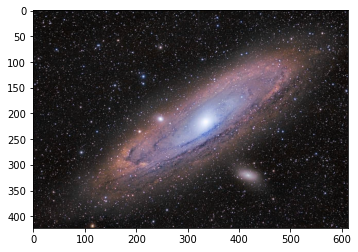

In [4]:
plt.imshow(img)

Linda! agora vamos cinzar ela

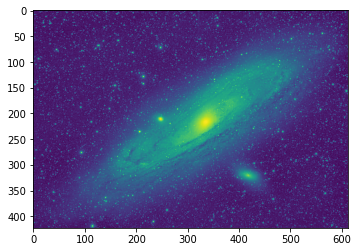

In [5]:
img = dn.cinzando(img)
plt.imshow(img)

Veja, que se não colocarmos o cmap como "gray", ele retorna a imagem azul (ou verde).

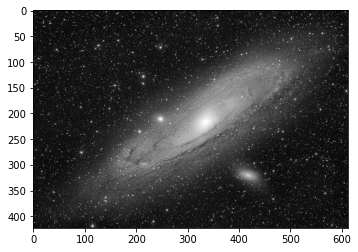

In [6]:
plt.imshow(img,cmap="gray")

Pronto! Será apartir daqui a nossa caminhada!
<hr>

vamos testar a biblioteca que filtra a matriz de pixel 3x3

In [7]:
 pixel = [[36,78,34],
          [23,57,80],
          [30,58,80]]


mediana = dn.mediana2D(pixel)

print(mediana)

58


In [8]:
dn.mediana2D_filtro(pixel)

array([[36, 58, 34],
       [23, 57, 58],
       [30, 58, 58]])

Veja, que os valores maiores do que a mediana, somem, e são substituídos pela mediana da matriz 3x3.

Como já foi dito na apresentação dessa função, ela também tem a propriedade de filtrar por limite de distância T, assim permitindo existir os que são maiores do que a mediana, mas que não ultrapassam um certo limite de "convergência"

In [9]:
dn.mediana2D_filtro(pixel,modo="T",T=20)

array([[58, 58, 58],
       [58, 57, 58],
       [58, 58, 58]])

Como é nítido, a pixelagem nesta questão é muito alta, mas a depender do problema, pode ajudar, de certa forma.
<br><br>
<b>Nota:</b> Um filtro parecido com este, é o gaussiano, mas não podemos tratar dele aqui (porquê é muito difícil, porém lindo!).

agora vamos impor ruído s&p na imagem.

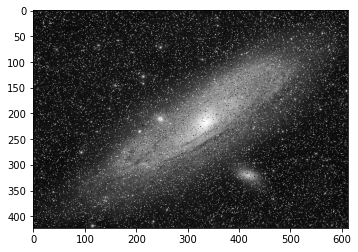

In [10]:
img_r = dn.adicionar_ruido(img)

plt.imshow(img_r,cmap='gray')
plt.show()

Agora vamos tirar o ruído com o que fizemos 

Primeiro mediano

então...
foi... sheipado


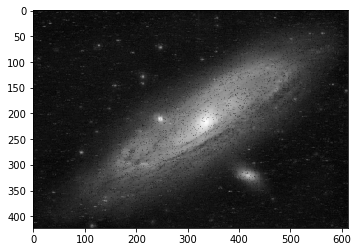

In [11]:
img_nova_m = dn.retirar_ruido(img_r,prt=False)

plt.imshow(img_nova_m,cmap="gray")
plt.show()

agora, com o T 

então...
foi... sheipado


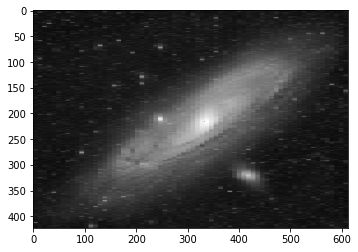

In [12]:
img_nova = dn.retirar_ruido(img_r,modo='T',T=10,prt=False)

plt.imshow(img_nova,cmap="gray")
plt.show()

### outro exemplo 

In [13]:
img = cv2.imread('test3.jpg')

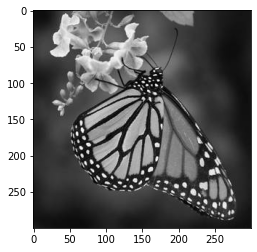

In [14]:
plt.imshow(img)

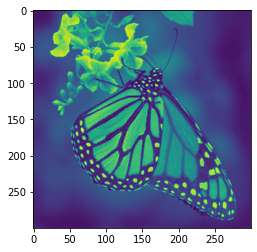

In [15]:
img = dn.cinzando(img)
plt.imshow(img)

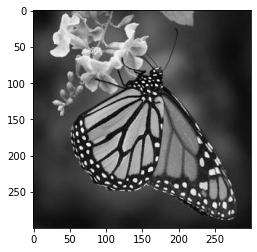

In [16]:
plt.imshow(img,cmap='gray')

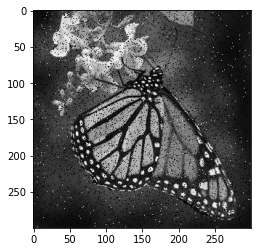

In [17]:
img_r = dn.adicionar_ruido(img)

plt.imshow(img_r,cmap='gray')
plt.show()

então...
foi... sheipado


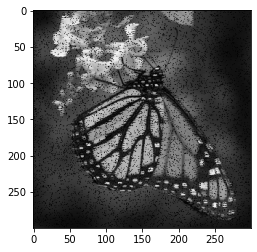

In [18]:
img_nova_m = dn.retirar_ruido(img_r,prt=False)

plt.imshow(img_nova_m,cmap="gray")
plt.show()

então...
foi... sheipado


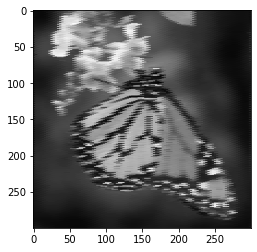

In [19]:
img_nova = dn.retirar_ruido(img_r,modo='T',T=3,prt=False)

plt.imshow(img_nova,cmap="gray")
plt.show()

então...
foi... sheipado


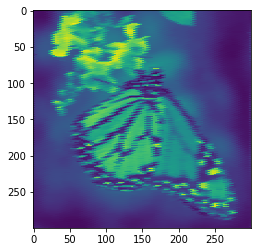

In [20]:
img_nova = dn.retirar_ruido(img_r,modo='T',T=3,prt=False)

plt.imshow(img_nova)
plt.show()

então...
foi... sheipado


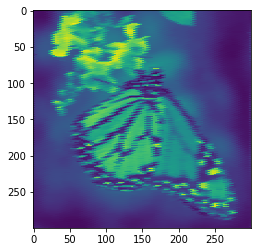

In [21]:
img_nova_n = dn.retirar_ruido(img_r,prt=False)

plt.imshow(img_nova_n)
plt.show()